In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
from utils import *

In [2]:
tex_fonts = {
    #source: https://jwalton.info/Embed-Publication-Matplotlib-Latex/
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    #"axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "axes.titlesize": 10,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    'text.latex.preamble': r"\usepackage{amsmath}"
}

In [3]:
year = 2020

In [4]:
data_folder = 'data'
data = gpd.read_file(data_folder + '/{}_spatial_raw_master.geojson'.format(year))
data.set_index('geography code', inplace=True)

In [5]:
data.shape, data.dropna().shape

((33755, 167), (28641, 167))

In [6]:
# 对数化
data['o_total_quantity_per_capita'] = data['o_total_quantity_per_capita'].apply(np.log)

In [7]:
data[data['geometry'].isna()]

,LSOA21NM,centroid_x,centroid_y,c_percent asian,c_percent black,c_percent mixed,c_percent white,c_percent sikh,c_percent hindu,c_percent christian,...,e_snow_and_ice,o_diabetes_quantity_per_capita,o_opioids_quantity_per_capita,o_OME_per_capita,o_total_quantity_per_capita,o_asthma_quantity_per_capita,o_hypertension_quantity_per_capita,o_depression_quantity_per_capita,o_anxiety_quantity_per_capita,geometry
geography code,,,,,,,,,,,,,,,,,,,,,


In [8]:
fn = 'LSOA_Dec_2021_Boundaries_Generalised_Clipped_EW_BGC_ExportLondon'
fp = data_folder + '/{}.shp'.format(fn)
London_lsoas_2021 = gpd.read_file(fp).rename(columns={'LSOA21CD':'geography code'})

(500655.0630000001, 564875.8130000001, 153596.65745000046, 203187.7495499992)

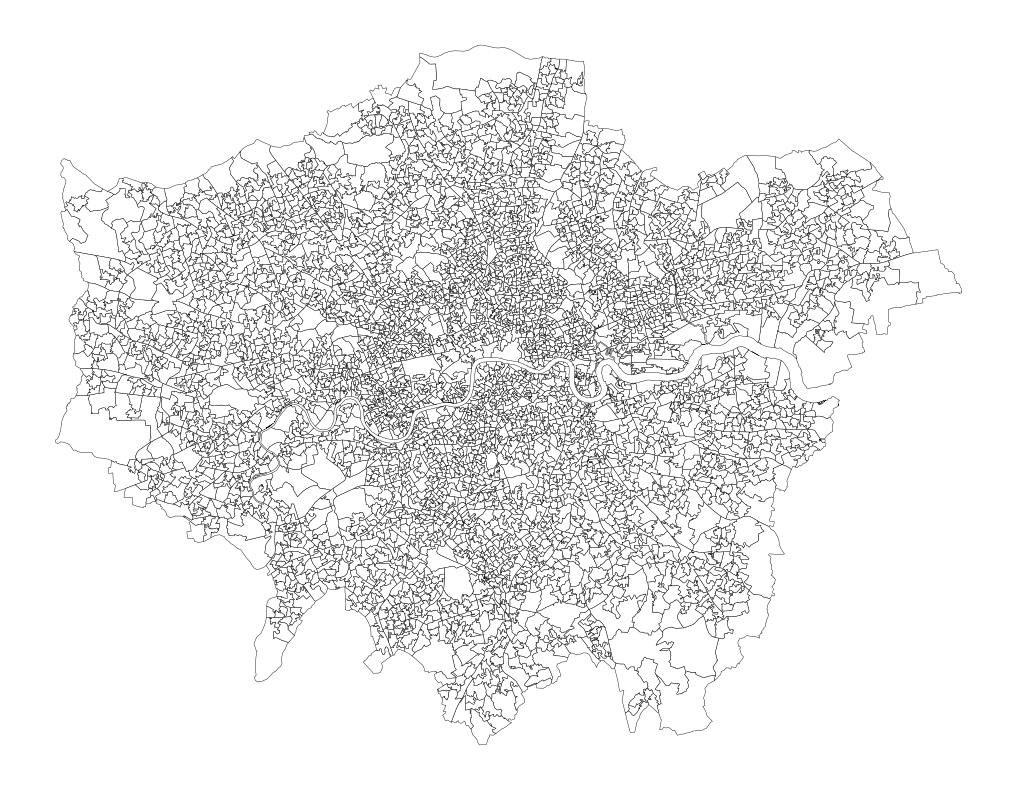

In [9]:
London_lsoas_2021 = London_lsoas_2021[London_lsoas_2021["geography code"].str.startswith("E")]

# Plotting the GeoPandas DataFrame
ax = London_lsoas_2021.plot(figsize=(15, 10), edgecolor='black', facecolor='white', linewidth=0.3)

# # Remove the axes
plt.axis('off')

# plt.savefig("../../figures/lsoas/england.jpg", dpi=300)

In [10]:
df = data.join(London_lsoas_2021[['geography code']].set_index('geography code'), on='geography code', how='right')

In [11]:
df.shape

(4994, 167)

In [12]:
csv_path = 'LondonLSOAs.csv'
df.to_csv(csv_path, index=False)